In [52]:
# Import matplotlib for creating static plots and visualizations
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization based on Matplotlib
import seaborn as sns

# Import bokeh for interactive and web-ready plotting
import bokeh

# Import palettes from Bokeh for color styling in plots
from bokeh.palettes import Spectral5, Magma, Inferno, Plasma, Viridis, Cividis

# Import colormaps from Matplotlib for color styling in plots
from matplotlib import colormaps


In [55]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Hants-FHRS.csv', encoding='cp1252') # encoding for UnicodeDecodeError 

By specifying the encoding as 'cp1252', we're telling Pandas how to interpret the bytes in the CSV file and decode them into Unicode strings. This can help resolve issues related to characters that are not part of the standard ASCII character set.

In [53]:
# Display the first few rows of the DataFrame
df.head()

RatingValue,0,1,2,3,4,5,AwaitingInspection,Exempt
LocalAuthorityName,,,,,,,,
Basingstoke and Deane,2.0,11.0,1.0,38.0,123.0,788.0,41.0,414.0
East Hampshire,NaN,7.0,9.0,10.0,114.0,804.0,106.0,43.0
Eastleigh,1.0,14.0,5.0,31.0,96.0,694.0,47.0,106.0
Fareham,1.0,8.0,11.0,17.0,77.0,594.0,19.0,27.0
Gosport,NaN,8.0,NaN,19.0,55.0,458.0,21.0,6.0


In [56]:
# Create a copy of the DataFrame
df_fsa = df.copy()

In [57]:
# Get the shape of the DataFrame - (rows,columns)
df_fsa.shape

(14891, 26)

In [58]:
# Get the column names of the DataFrame
df_fsa.columns

Index(['Source.Name', 'FHRSID', 'LocalAuthorityBusinessID', 'BusinessName',
       'BusinessType', 'BusinessTypeID', 'RatingValue', 'RatingKey',
       'RatingDate', 'LocalAuthorityCode', 'LocalAuthorityName',
       'LocalAuthorityWebSite', 'LocalAuthorityEmailAddress', 'Scores.Hygiene',
       'Scores.Structural', 'Scores.ConfidenceInManagement',
       'Scores.Element:Text', 'SchemeType', 'NewRatingPending', 'Longitude',
       'Latitude', 'AddressLine1', 'AddressLine2', 'AddressLine3', 'PostCode',
       'AddressLine4'],
      dtype='object')

In [59]:
# Drop specified columns from the DataFrame
df_fsa = df_fsa.drop(columns=['Source.Name', 'LocalAuthorityWebSite', 'LocalAuthorityEmailAddress'])

# Display the modified DataFrame
df_fsa


,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,RatingValue,RatingKey,RatingDate,LocalAuthorityCode,LocalAuthorityName,...,Scores.Element:Text,SchemeType,NewRatingPending,Longitude,Latitude,AddressLine1,AddressLine2,AddressLine3,PostCode,AddressLine4
0,1666819,23/00135/FOOD,A&J Sweets,Other catering premises,7841,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,877,Southampton,...,NaN,FHRS,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1661788,23/00102/FOOD,A-B's Balloons & Treats,Other catering premises,7841,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,877,Southampton,...,NaN,FHRS,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1318379,20/00209/FOOD,Adore Donuts,Other catering premises,7841,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,877,Southampton,...,NaN,FHRS,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1390706,21/00215/FOOD,Anu Cake Creactions,Other catering premises,7841,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,877,Southampton,...,NaN,FHRS,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1551394,22/00110/FOOD,Argie's Cakes & Finger Foods Limited,Other catering premises,7841,AwaitingInspection,fhrs_awaitinginspection_en-GB,NaN,877,Southampton,...,NaN,FHRS,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14886,1665633,28582,Uk pizza and kebab house,Takeaway/sandwich shop,7844,5,fhrs_5_en-GB,19/12/23,137,Havant,...,NaN,FHRS,False,-0.984984,50.866611,38 Park Parade,NaN,NaN,PO9 5AD,Havant
14887,133145,656,Warblington School,School/college/university,7845,5,fhrs_5_en-GB,22/2/23,137,Havant,...,NaN,FHRS,False,-0.969075,50.851349,Warblington School,NaN,NaN,PO9 2RR,Havant
14888,1627504,27905,Welcome Denvilles,Retailers - supermarkets/hypermarkets,7840,5,fhrs_5_en-GB,3/5/23,137,Havant,...,NaN,FHRS,False,-0.962574,50.861006,40 Snowberry Crescent,NaN,NaN,PO9 2FE,Havant
14889,143824,815,Wilko,Retailers - other,4613,5,fhrs_5_en-GB,21/3/23,137,Havant,...,NaN,FHRS,False,-0.982052,50.852333,51-55 Meridian Centre,NaN,NaN,PO9 1UW,Havant


In [60]:
# Get the column names of the DataFrame after dropping few
df_fsa.columns

Index(['FHRSID', 'LocalAuthorityBusinessID', 'BusinessName', 'BusinessType',
       'BusinessTypeID', 'RatingValue', 'RatingKey', 'RatingDate',
       'LocalAuthorityCode', 'LocalAuthorityName', 'Scores.Hygiene',
       'Scores.Structural', 'Scores.ConfidenceInManagement',
       'Scores.Element:Text', 'SchemeType', 'NewRatingPending', 'Longitude',
       'Latitude', 'AddressLine1', 'AddressLine2', 'AddressLine3', 'PostCode',
       'AddressLine4'],
      dtype='object')

Exploration of columns that isn't relevant for the analysis

In [61]:
# Get unique values in the 'Scores.Element:Text' column (check for null values)
df_fsa['Scores.Element:Text'].unique()

array([nan])

In [62]:
# Count occurrences of each unique value in the 'BusinessTypeID' column - no null values.
df_fsa['BusinessTypeID'].value_counts()

BusinessTypeID
1       2951
4613    2617
7841    2498
7843    1374
5       1302
7844    1275
7845     913
7846     864
7840     411
7842     327
7839     234
7         83
7838      29
14        13
Name: count, dtype: int64

In [63]:
# Drop more columns from the DataFrame which are not relevant for the analysis
df_fsa =df_fsa.drop(columns=['LocalAuthorityBusinessID','RatingKey','SchemeType','Scores.Element:Text','LocalAuthorityCode','BusinessTypeID'])

df_fsa

,FHRSID,BusinessName,BusinessType,RatingValue,RatingDate,LocalAuthorityName,Scores.Hygiene,Scores.Structural,Scores.ConfidenceInManagement,NewRatingPending,Longitude,Latitude,AddressLine1,AddressLine2,AddressLine3,PostCode,AddressLine4
0,1666819,A&J Sweets,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1661788,A-B's Balloons & Treats,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1318379,Adore Donuts,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1390706,Anu Cake Creactions,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1551394,Argie's Cakes & Finger Foods Limited,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14886,1665633,Uk pizza and kebab house,Takeaway/sandwich shop,5,19/12/23,Havant,5.0,5.0,5.0,False,-0.984984,50.866611,38 Park Parade,NaN,NaN,PO9 5AD,Havant
14887,133145,Warblington School,School/college/university,5,22/2/23,Havant,5.0,5.0,5.0,False,-0.969075,50.851349,Warblington School,NaN,NaN,PO9 2RR,Havant
14888,1627504,Welcome Denvilles,Retailers - supermarkets/hypermarkets,5,3/5/23,Havant,5.0,5.0,5.0,False,-0.962574,50.861006,40 Snowberry Crescent,NaN,NaN,PO9 2FE,Havant
14889,143824,Wilko,Retailers - other,5,21/3/23,Havant,5.0,5.0,5.0,False,-0.982052,50.852333,51-55 Meridian Centre,NaN,NaN,PO9 1UW,Havant


In [64]:
# Renaming specified columns in the DataFrame
df_fsa = df_fsa.rename(columns={'Scores.Hygiene': 'HygeineScore', 'Scores.Structural': 'StructuralScore','Scores.ConfidenceInManagement':'ConfidenceInManagementScore'})
df_fsa

,FHRSID,BusinessName,BusinessType,RatingValue,RatingDate,LocalAuthorityName,HygeineScore,StructuralScore,ConfidenceInManagementScore,NewRatingPending,Longitude,Latitude,AddressLine1,AddressLine2,AddressLine3,PostCode,AddressLine4
0,1666819,A&J Sweets,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1661788,A-B's Balloons & Treats,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1318379,Adore Donuts,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1390706,Anu Cake Creactions,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1551394,Argie's Cakes & Finger Foods Limited,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14886,1665633,Uk pizza and kebab house,Takeaway/sandwich shop,5,19/12/23,Havant,5.0,5.0,5.0,False,-0.984984,50.866611,38 Park Parade,NaN,NaN,PO9 5AD,Havant
14887,133145,Warblington School,School/college/university,5,22/2/23,Havant,5.0,5.0,5.0,False,-0.969075,50.851349,Warblington School,NaN,NaN,PO9 2RR,Havant
14888,1627504,Welcome Denvilles,Retailers - supermarkets/hypermarkets,5,3/5/23,Havant,5.0,5.0,5.0,False,-0.962574,50.861006,40 Snowberry Crescent,NaN,NaN,PO9 2FE,Havant
14889,143824,Wilko,Retailers - other,5,21/3/23,Havant,5.0,5.0,5.0,False,-0.982052,50.852333,51-55 Meridian Centre,NaN,NaN,PO9 1UW,Havant


In [13]:
# Count occurrences of each unique value in the 'NewRatingPending' column
df_fsa['NewRatingPending'].value_counts()

NewRatingPending
False    14829
True        62
Name: count, dtype: int64

In [65]:
# Get unique values in the 'RatingValue' column
df_fsa['RatingValue'].unique()

array(['AwaitingInspection', 'Exempt', '3', '1', '0', '4', '5', '2'],
      dtype=object)

In [15]:
df_fsa.columns

Index(['FHRSID', 'BusinessName', 'BusinessType', 'RatingValue', 'RatingDate',
       'LocalAuthorityName', 'HygeineScore', 'StructuralScore',
       'ConfidenceInManagementScore', 'NewRatingPending', 'Longitude',
       'Latitude', 'AddressLine1', 'AddressLine2', 'AddressLine3', 'PostCode',
       'AddressLine4'],
      dtype='object')

Dropping more columns as my analysis doesnot require these.

In [16]:
df_fsa=df_fsa.drop(columns=['HygeineScore','StructuralScore',
       'ConfidenceInManagementScore', 'NewRatingPending'])
df_fsa

,FHRSID,BusinessName,BusinessType,RatingValue,RatingDate,LocalAuthorityName,Longitude,Latitude,AddressLine1,AddressLine2,AddressLine3,PostCode,AddressLine4
0,1666819,A&J Sweets,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1661788,A-B's Balloons & Treats,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1318379,Adore Donuts,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1390706,Anu Cake Creactions,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1551394,Argie's Cakes & Finger Foods Limited,Other catering premises,AwaitingInspection,NaN,Southampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14886,1665633,Uk pizza and kebab house,Takeaway/sandwich shop,5,19/12/23,Havant,-0.984984,50.866611,38 Park Parade,NaN,NaN,PO9 5AD,Havant
14887,133145,Warblington School,School/college/university,5,22/2/23,Havant,-0.969075,50.851349,Warblington School,NaN,NaN,PO9 2RR,Havant
14888,1627504,Welcome Denvilles,Retailers - supermarkets/hypermarkets,5,3/5/23,Havant,-0.962574,50.861006,40 Snowberry Crescent,NaN,NaN,PO9 2FE,Havant
14889,143824,Wilko,Retailers - other,5,21/3/23,Havant,-0.982052,50.852333,51-55 Meridian Centre,NaN,NaN,PO9 1UW,Havant


In [17]:
# Count occurrences of each unique value in the 'BusinessType' column
Biz_type=df_fsa['BusinessType'].value_counts()
Biz_type

BusinessType
Restaurant/Cafe/Canteen                  2951
Retailers - other                        2617
Other catering premises                  2498
Pub/bar/nightclub                        1374
Hospitals/Childcare/Caring Premises      1302
Takeaway/sandwich shop                   1275
School/college/university                 913
Mobile caterer                            864
Retailers - supermarkets/hypermarkets     411
Hotel/bed & breakfast/guest house         327
Manufacturers/packers                     234
Distributors/Transporters                  83
Farmers/growers                            29
Importers/Exporters                        13
Name: count, dtype: int64

In [18]:
# Group by 'BusinessType' and 'RatingValue', and count occurrences
Biz_type_ratings=df_fsa.groupby(['BusinessType'])['RatingValue'].value_counts().unstack();
Biz_type_ratings

RatingValue,0,1,2,3,4,5,AwaitingInspection,Exempt
BusinessType,,,,,,,,
Distributors/Transporters,NaN,1.0,NaN,1.0,3.0,30.0,12.0,36.0
Farmers/growers,NaN,NaN,NaN,NaN,1.0,20.0,1.0,7.0
Hospitals/Childcare/Caring Premises,NaN,5.0,2.0,17.0,117.0,1039.0,40.0,82.0
Hotel/bed & breakfast/guest house,NaN,1.0,3.0,4.0,38.0,269.0,8.0,4.0
Importers/Exporters,NaN,NaN,NaN,NaN,NaN,8.0,2.0,3.0
Manufacturers/packers,1.0,1.0,1.0,2.0,15.0,155.0,46.0,13.0
Mobile caterer,1.0,5.0,NaN,8.0,64.0,597.0,179.0,10.0
Other catering premises,1.0,2.0,3.0,13.0,105.0,1599.0,378.0,397.0
Pub/bar/nightclub,2.0,19.0,11.0,56.0,230.0,960.0,83.0,13.0


Visualize this DataFrame to understand the distribution of ratings across different business types. 

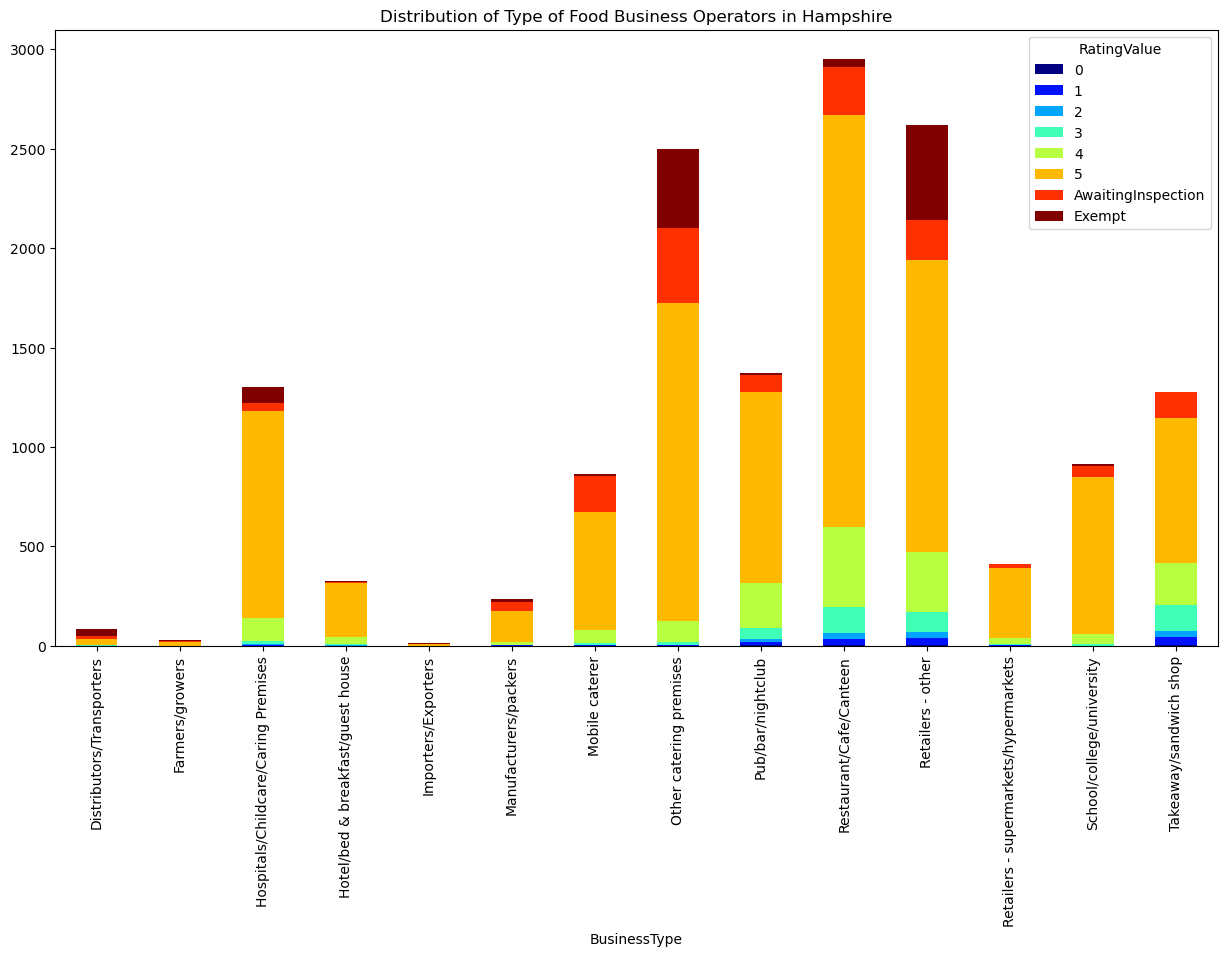

In [19]:

# Create a stacked bar plot
biztype_plot=Biz_type_ratings.plot(kind='bar',stacked=True,title= 'Distribution of Type of Food Business Operators in Hampshire',figsize=(15,8),colormap ='jet');



 Analyze and visualize the distribution of ratings in the dataset

In [20]:
ratings=df_fsa['RatingValue'].value_counts()
ratings

RatingValue
5                     10096
4                      1561
AwaitingInspection     1391
Exempt                 1091
3                       484
1                       142
2                       109
0                        17
Name: count, dtype: int64

The rating scale
The hygiene standards found at the time of inspection are rated on a scale.

Your business will get a rating from 5 to 0:

5 – hygiene standards are very good
4 – hygiene standards are good
3 – hygiene standards are generally satisfactory
2 – some improvement is necessary
1 – major improvement is necessary
0 – urgent improvement is necessary

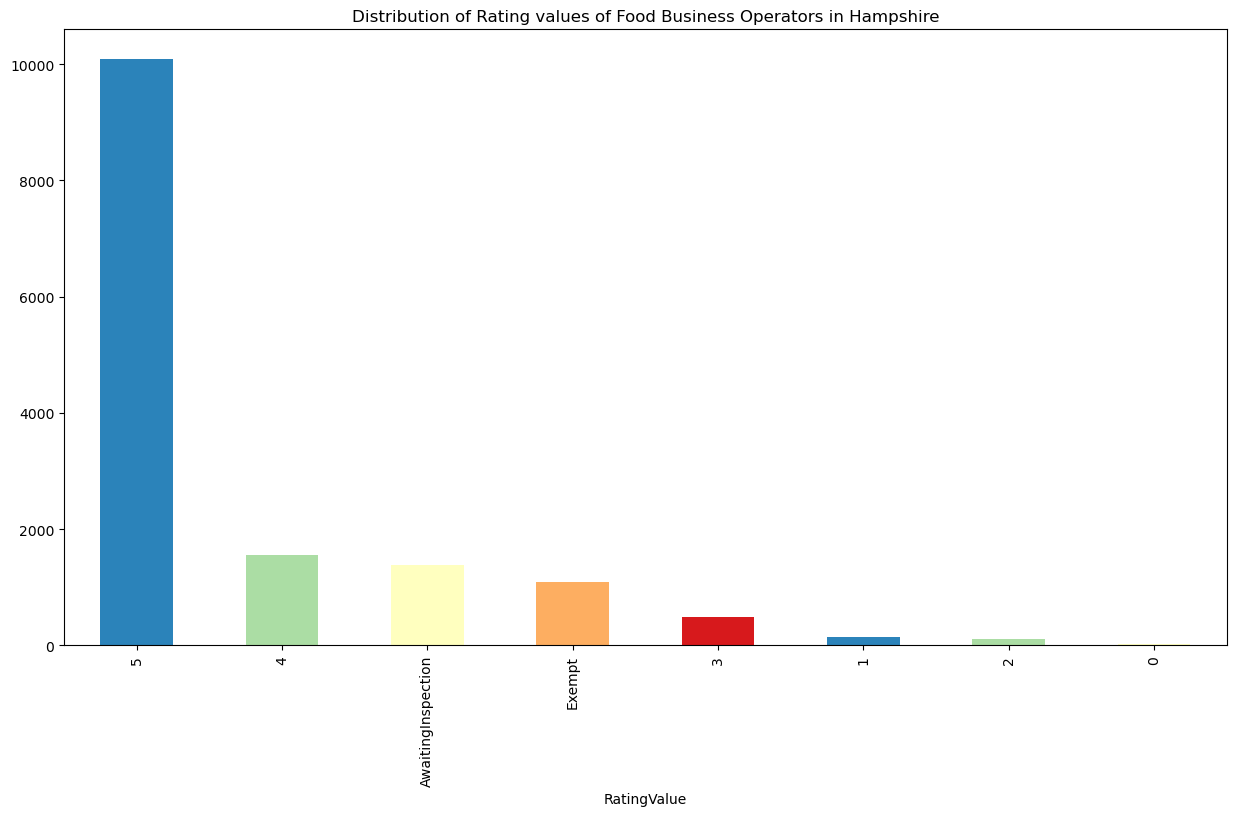

In [66]:
# Set the figure size
plt.figure(figsize=(15,8))
# Create a bar plot
rating_plot=ratings.plot(kind='bar',title= 'Distribution of Rating values of Food Business Operators in Hampshire',color=Spectral5);

# Show the plot
plt.show()


Exploring the number of business operators in each local authority of hampshire.
Portsmouth has the largest number of fbos and gosport has the least. 

In [22]:
LocalAuthority=df_fsa['LocalAuthorityName'].value_counts()
LocalAuthority

LocalAuthorityName
Portsmouth               2050
Southampton              1849
New Forest               1721
Basingstoke and Deane    1418
East Hampshire           1093
Winchester City          1048
Test Valley              1046
Eastleigh                 994
Havant                    968
Fareham                   754
Rushmoor                  710
Hart                      673
Gosport                   567
Name: count, dtype: int64

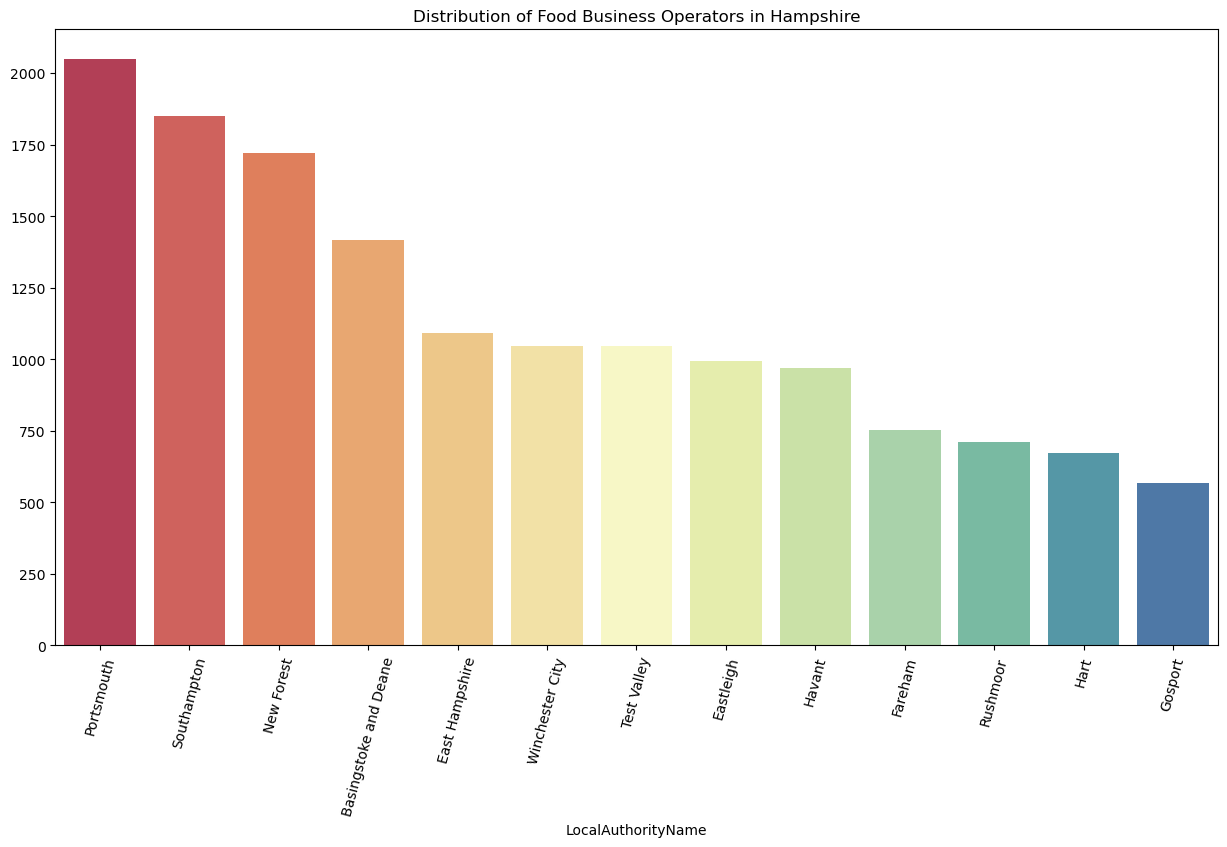

In [78]:
# Set the color palette
sns.set_palette("bright")

# Create a figure and set the size
plt.figure(figsize=(15, 8))

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Create the bar plot using Seaborn's barplot function
LA_Plot = sns.barplot(x=LocalAuthority.index, y=LocalAuthority.values, palette="Spectral")

# Set the title of the plot
LA_Plot.set_title('Distribution of Food Business Operators in Hampshire')

# Show the plot
plt.show()


In [24]:
LA_ratings=df_fsa.groupby(['LocalAuthorityName'])['RatingValue'].value_counts().unstack();
LA_ratings

RatingValue,0,1,2,3,4,5,AwaitingInspection,Exempt
LocalAuthorityName,,,,,,,,
Basingstoke and Deane,2.0,11.0,1.0,38.0,123.0,788.0,41.0,414.0
East Hampshire,NaN,7.0,9.0,10.0,114.0,804.0,106.0,43.0
Eastleigh,1.0,14.0,5.0,31.0,96.0,694.0,47.0,106.0
Fareham,1.0,8.0,11.0,17.0,77.0,594.0,19.0,27.0
Gosport,NaN,8.0,NaN,19.0,55.0,458.0,21.0,6.0
Hart,NaN,4.0,4.0,22.0,85.0,468.0,36.0,54.0
Havant,NaN,6.0,NaN,11.0,58.0,690.0,100.0,103.0
New Forest,6.0,21.0,7.0,55.0,206.0,1238.0,73.0,115.0
Portsmouth,5.0,25.0,38.0,109.0,280.0,1286.0,255.0,52.0


This will create a stacked bar plot for the distribution of rating values of food business operators in Hampshire with the specified title using Matplotlib

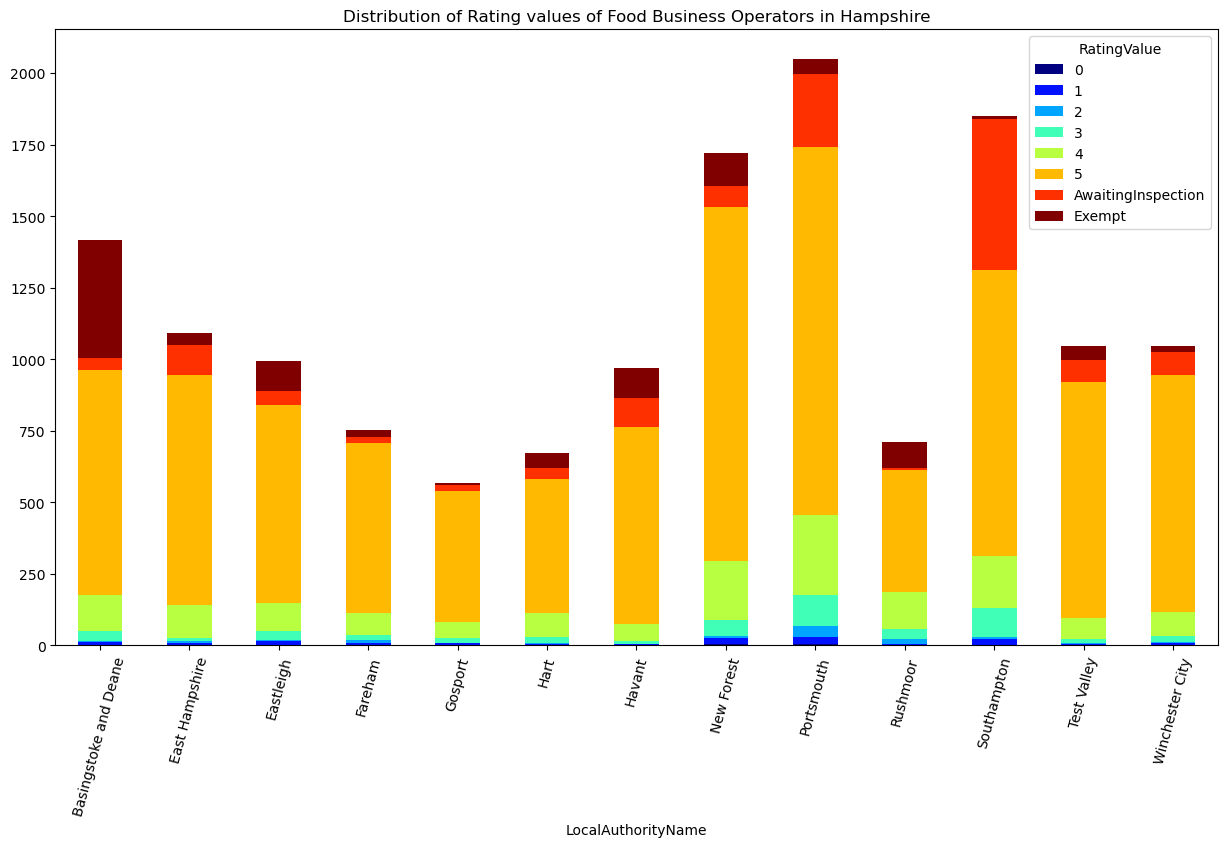

In [74]:
# Define the title
title= 'Distribution of Rating values of Food Business Operators in Hampshire'
# Create the stacked bar plot
LA_ratings.plot(kind='bar',title= title,stacked=True,figsize=(15,8),colormap ='jet');
# Rotate x-axis labels for better readability
plt.xticks(rotation = 75);

There are 1091 FBOs that are exempt from rating. 
There are two groups of exempt businesses which are inspected by the local authority food safety officer but are not given a food hygiene rating:

businesses that are low-risk to public health, for example, newsagents, chemist shops or visitor centres selling pre-wrapped goods that do not require refrigeration 
childminders and businesses that offer caring services at home.

In [75]:
# Filter the DataFrame to include only rows where 'RatingValue' is 'Exempt'
Exempt_FBO = df_fsa[df_fsa['RatingValue'] == 'Exempt']

# Count occurrences of each local authority in the filtered DataFrame
LA_exempt = Exempt_FBO['LocalAuthorityName'].value_counts()
LA_exempt

LocalAuthorityName
Basingstoke and Deane    414
New Forest               115
Eastleigh                106
Havant                   103
Rushmoor                  91
Hart                      54
Portsmouth                52
Test Valley               49
East Hampshire            43
Fareham                   27
Winchester City           23
Southampton                8
Gosport                    6
Name: count, dtype: int64

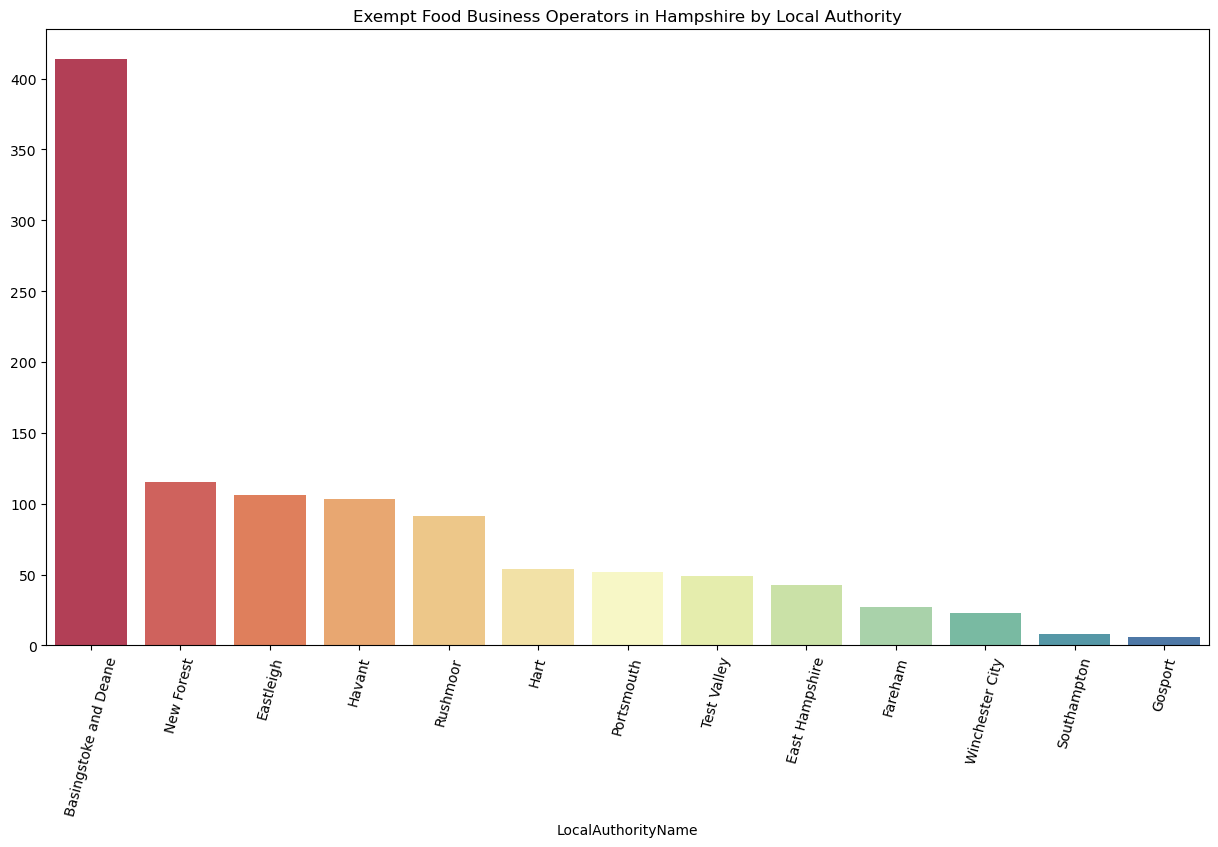

In [77]:

# Set the figure size
plt.figure(figsize=(15, 8))

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Create the bar plot
sns.barplot(x=LA_exempt.index, y=LA_exempt.values, palette='Spectral')

# Set the title of the plot
plt.title('Exempt Food Business Operators in Hampshire by Local Authority')

# Show the plot
plt.show()


If a new business has been set up, or there is a new owner, it will not have a food hygiene rating to begin with but it may display a sticker that says 'Awaiting Inspection'. 
A rating will be given after a local authority food safety officer has inspected the business to check the hygiene standards.

In [80]:
# Filter the DataFrame to include only rows where 'RatingValue' is 'AwaitingInspection'
Await_FBO = df_fsa[df_fsa['RatingValue'] == 'AwaitingInspection']

# Count occurrences of each local authority in the filtered DataFrame
LA_await = Await_FBO['LocalAuthorityName'].value_counts()
LA_await

LocalAuthorityName
Southampton              530
Portsmouth               255
East Hampshire           106
Havant                   100
Winchester City           79
Test Valley               78
New Forest                73
Eastleigh                 47
Basingstoke and Deane     41
Hart                      36
Gosport                   21
Fareham                   19
Rushmoor                   6
Name: count, dtype: int64

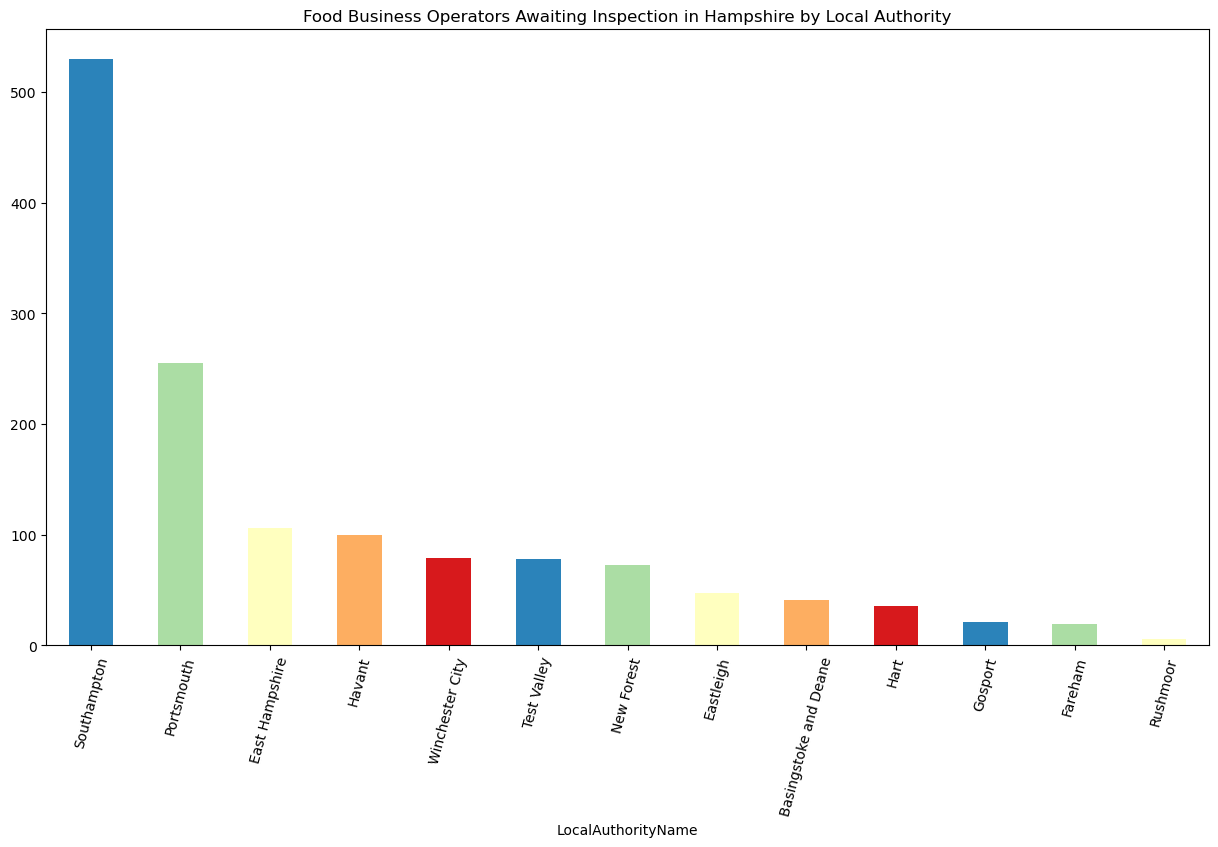

In [92]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Create the bar plot
LAawait_Plot = LA_await.plot(kind='bar', title='Food Business Operators Awaiting Inspection in Hampshire by Local Authority', color=Spectral5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Show the plot
plt.show()


In [30]:
# Selecting specific columns from df_fsa to create df_map
df_map = df_fsa[['Latitude','Longitude','BusinessName','RatingValue','LocalAuthorityName','PostCode']]
df_map

,Latitude,Longitude,BusinessName,RatingValue,LocalAuthorityName,PostCode
0,NaN,NaN,A&J Sweets,AwaitingInspection,Southampton,NaN
1,NaN,NaN,A-B's Balloons & Treats,AwaitingInspection,Southampton,NaN
2,NaN,NaN,Adore Donuts,AwaitingInspection,Southampton,NaN
3,NaN,NaN,Anu Cake Creactions,AwaitingInspection,Southampton,NaN
4,NaN,NaN,Argie's Cakes & Finger Foods Limited,AwaitingInspection,Southampton,NaN
...,...,...,...,...,...,...
14886,50.866611,-0.984984,Uk pizza and kebab house,5,Havant,PO9 5AD
14887,50.851349,-0.969075,Warblington School,5,Havant,PO9 2RR
14888,50.861006,-0.962574,Welcome Denvilles,5,Havant,PO9 2FE
14889,50.852333,-0.982052,Wilko,5,Havant,PO9 1UW


In [82]:
# Count the number of missing values in each column
df_map.isnull().sum()

Latitude              3583
Longitude             3583
BusinessName             0
RatingValue              0
LocalAuthorityName       0
PostCode              3355
dtype: int64

In [83]:
# handling missing data before visualization by dropping
df_plotmap=df_map.dropna()
df_plotmap

,Latitude,Longitude,BusinessName,RatingValue,LocalAuthorityName,PostCode
3140,50.820473,-1.079309,68 North End Avenue,Exempt,Portsmouth,PO2 9EB
3141,51.111470,-0.862365,Alca Food,3,East Hampshire,GU35 0TQ
3142,51.147497,-0.977098,Alibaba Eats,3,East Hampshire,GU34 1AB
3143,51.152876,-0.969539,Alton Food and Wine,1,East Hampshire,GU34 2RA
3144,51.148801,-0.976441,Alton Gurkha,3,East Hampshire,GU34 1HA
...,...,...,...,...,...,...
14886,50.866611,-0.984984,Uk pizza and kebab house,5,Havant,PO9 5AD
14887,50.851349,-0.969075,Warblington School,5,Havant,PO9 2RR
14888,50.861006,-0.962574,Welcome Denvilles,5,Havant,PO9 2FE
14889,50.852333,-0.982052,Wilko,5,Havant,PO9 1UW


In [34]:
#df_plotmap.plot(x="Longitude", y="Latitude", kind="scatter");

In [84]:
# Rename columns in df_plotmap
df_fsa_map = df_plotmap.rename(columns={'BusinessName': 'BizName', 'RatingValue': 'Rating', 'LocalAuthorityName': 'Authority'})

# Sort the DataFrame by the 'Rating' column
df_mapfsa = df_fsa_map.sort_values(by='Rating')

# Display the sorted DataFrame
df_mapfsa

,Latitude,Longitude,BizName,Rating,Authority,PostCode
9939,50.721451,-1.567651,THE GUN INN,0,New Forest,SO41 0TP
9898,50.856037,-1.788710,MOODY COW FARM SHOP,0,New Forest,BH24 3PA
7642,50.924880,-1.457580,Balti House,0,Southampton,SO16 9DD
5628,50.797131,-1.077018,Adam Food,0,Portsmouth,PO1 5AB
5680,50.844849,-1.066628,May's Of Cosham,0,Portsmouth,PO6 3AX
...,...,...,...,...,...,...
10986,51.339003,-0.846370,Slimming World Franchise,Exempt,Hart,GU46 6FR
10985,51.340968,-0.818756,News Letter,Exempt,Hart,GU46 7UN
10983,51.283481,-0.839560,Majestic Wine,Exempt,Hart,GU51 4PA
11005,51.207619,-1.479623,MILLETS,Exempt,Test Valley,SP10 1LJ


Distribution of rating values of food businesses across different local authorities in Hampshire using a heatmap, with each cell representing the count of businesses with a specific rating value within each local authority.

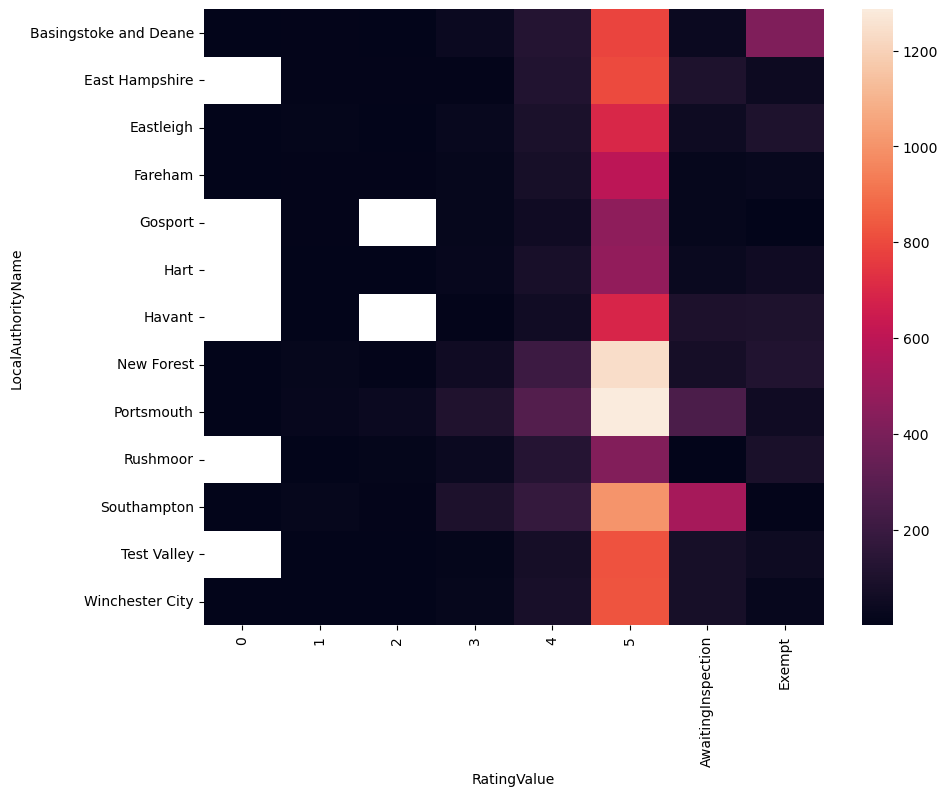

In [36]:
# Grouping the data
df=df_fsa.groupby(['LocalAuthorityName'])['RatingValue'].value_counts().unstack();
# Creating the heatmap
fig,ax = plt.subplots(1,1,figsize = (10,8))
ax = sns.heatmap(df)
plt.show()

Interactive map showing the hygeine ratings of businesses in Hampshire. Hover over the markers to get information.
This is helpful in easily spotting the ratings and the business operators. 

In [107]:
# Create a scatter mapbox plot with hover information
fig = px.scatter_mapbox(df_mapfsa,
                        hover_data=["Rating", "Authority", "PostCode"],
                        hover_name="BizName",
                        color="Rating",
                        lat="Latitude", lon="Longitude",
                        color_continuous_scale=px.colors.sequential.Bluered,
                        height=600, width=980, size_max=15, zoom=7.5,animation_frame="Rating")

# Update the layout to customize the map appearance
fig.update_layout(
    mapbox_style="carto-positron",  # Set the map style
    margin={"r": 0, "t": 0, "l": 0, "b": 0},  # Set the layout margin
    transition={'duration': 500},  # Set the transition duration to 500 milliseconds
    #legend_orientation="h"
)

# Show the interactive map
fig.show()
import plotly.io as pio

# Assume fig is your Plotly figure
# Create or update your Plotly figure
fig.update_layout(
    title="My Interactive Map",  # Set the title
    showlegend=True,  # Show legend
    #legend_title="Rating",  # Set legend title
    
    #legend_orientation="h"  # Set legend orientation
)

# Save the Plotly figure to an HTML file
pio.write_html(fig, 'Desktop/DataAnalysis2023-24/FSA_Data/my_map.html')
